# KNN is heavily affected by outliers and noise. Need to perform data standardisation.
We use KNN on 
- Labeled dataset
- Noise free
- Small size (uses a lot of memory)

# Task 1. Dataset Description

In [108]:
import pandas as pd

df = pd.read_csv("teleCust1000t.csv")
df = df[df.income < 1000] # Remove rows with 'income' over 1000

head = df.head()
describe = df.describe()
info = df.info()


# From looking at describe variable table we can see that there are only two rows that have income value >1000, I'd consider these outliers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   998 non-null    int64  
 1   tenure   998 non-null    int64  
 2   age      998 non-null    int64  
 3   marital  998 non-null    int64  
 4   address  998 non-null    int64  
 5   income   998 non-null    float64
 6   ed       998 non-null    int64  
 7   employ   998 non-null    int64  
 8   retire   998 non-null    float64
 9   gender   998 non-null    int64  
 10  reside   998 non-null    int64  
 11  custcat  998 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 101.4 KB


# Task 2. Basic data processing

## 2.1 See how many instances of each class is the given dataset using visualisation techniques

## 2.2 Convert Pandas DataFrame to NumPy array

In [109]:
import numpy as np

df_asarray = np.asarray(df)

## 2.3 Define the attribute set and the target value 'custcat'

In [110]:
# X = df.drop(labels="custcat", axis=1) # features
X = df[["ed", "tenure", "income", "employ"]] # features
y = df["custcat"]                     # Target

correlation = df.corr()

X_asarray = np.asarray(X)
y_asarray = np.asarray(y)

## 2.4 Perform z-score standardisation for feature scaling using preprocessing.StandardScaler() from sklearn

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_asarray)
print(scaler.mean_)

X_asarray_transformed = scaler.transform(X_asarray)
print(X_asarray_transformed)

[ 2.67034068 35.48797595 74.88577154 10.93687375]
[[ 1.08801161 -1.05368033 -0.12312886 -0.59270523]
 [ 1.90627506 -1.14739089  0.69126244 -0.59270523]
 [-1.36677872  1.52335988  0.46504264  1.80332441]
 ...
 [ 1.90627506  1.4765046   9.83054253  2.20266268]
 [-0.54851527  1.61707043  0.13702392  1.10448243]
 [ 0.26974817  0.6799649  -0.40590361 -0.79237436]]


## 2.5 Using skikit-learn perform training and test data split 80-20

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_asarray_transformed, y_asarray, train_size=0.8)

# Task 3. Kick start KNN

## 3.1 Develop a classifier with K = 3 using KNeighborsClassifier() from sklearn.neighbors

In [79]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# print(classifier)

## 3.2 Check the accuracy of your classifier on the test dataset, using metrics.accuracy_score() from sklearn

In [80]:
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
def mean_absolute_percentage_error(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100



print("Accuracy score:", accuracy_score(y_test, y_pred))
print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred)}")
# print(f"Residual sum of squares: {np.linalg.lstsq(y_test, y_pred)}")
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"Mean absolute percentage error: {mean_absolute_percentage_error(y_test, y_pred)}")

Accuracy score: 0.31
Mean absolute error: 1.19
R2 score: -0.8407558368864931
Mean absolute percentage error: 60.70833333333333


# Task 4. Which is the optimal value of K?
Develop a loop wherein you can evaluate the accuracy of your KNN classifier starting from K = 1 until K = 10. You are required to calculate the model accuracy at every step as before.


K = 1
Accuracy score: 0.32
Mean absolute error: 1.14
R2 score: -0.8555667001003011
Mean absolute percentage error: 68.29166666666667

K = 2
Accuracy score: 0.3
Mean absolute error: 1.11
R2 score: -0.7301905717151456
Mean absolute percentage error: 51.74999999999999

K = 3
Accuracy score: 0.34
Mean absolute error: 1.155
R2 score: -0.9600468070879307
Mean absolute percentage error: 59.375

K = 4
Accuracy score: 0.375
Mean absolute error: 1.075
R2 score: -0.7761618187897026
Mean absolute percentage error: 52.54166666666668

K = 5
Accuracy score: 0.33
Mean absolute error: 1.17
R2 score: -0.9976596456034774
Mean absolute percentage error: 62.041666666666664

K = 6
Accuracy score: 0.37
Mean absolute error: 1.08
R2 score: -0.7970578401872286
Mean absolute percentage error: 55.33333333333332

K = 7
Accuracy score: 0.355
Mean absolute error: 1.09
R2 score: -0.7886994316282181
Mean absolute percentage error: 55.83333333333332

K = 8
Accuracy score: 0.345
Mean absolute error: 1.14
R2 score: -0.9

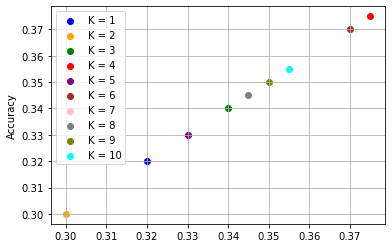

In [112]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

features = ["ed", "tenure", "income", "employ"] # features here
target = "custcat"                              # Target here
dataset = "teleCust1000t.csv"                   # Dataset path
random_state = 897326

df = pd.read_csv(dataset)   # Load data
df = df[df.income < 1000]   # Remove rows with 'income' over 1000
correlation_all = df.corr() # Create a correlation table for all features

X = df[features] # features
y = df[target]   # Target

X_asarray = np.asarray(X) # Transform dataframe to array
y_asarray = np.asarray(y) # Transform dataframe to array

scaler = StandardScaler() # Initialise the scaler
scaler.fit(X_asarray)     # Fit on data
# print(scaler.mean_)

X_asarray_transformed = scaler.transform(X_asarray) # Transform data to scale

X_train, X_test, y_train, y_test = train_test_split(X_asarray_transformed, 
                                                    y_asarray,
                                                    random_state=random_state, 
                                                    train_size=0.8) # Split data


def mean_absolute_percentage_error(actual, pred): # Define MAPE calculation function
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]

for k in range(1, 11):

    classifier = KNeighborsClassifier(n_neighbors=k) # Initialise classifier
    classifier.fit(X_train, y_train)                 # Fit classifier on scaled data
    y_pred = classifier.predict(X_test)              # Predict y on scaled X_test data


    print("\nK =", k)
    print("Accuracy score:", a:=accuracy_score(y_test, y_pred))
    print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred)}")
    # print(f"Residual sum of squares: {np.linalg.lstsq(y_test, y_pred)}")
    print(f"R2 score: {r2_score(y_test, y_pred)}")
    print(f"Mean absolute percentage error: {mean_absolute_percentage_error(y_test, y_pred)}")

    plt.scatter(a, a, label=f"K = {k}", color=colors[k-1])

plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.grid()

# Task 5. Visualisation of model accuracy
Plot the model accuracy for the different values of K. Purpose of this task is to visualise the comparison among the various neighbours, as performed in the above task. 

In [ ]:
# Done in cell above